### Font type Recognition using Feed Forward Network

* <font size=4 color='green'>MSTC seminar on Deep Learning & Tensorflow</font>

In [1]:
import tensorflow as tf
import numpy as np
import math

In [2]:
!python -m pip install tqdm

  Using cached tqdm-4.11.2-py2.py3-none-any.whl


Exception:
Traceback (most recent call last):
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/wheel.py", line 316, in clobber

In [3]:
from tqdm import tqdm, tqdm_notebook

In [8]:
import time
for i in tqdm_notebook(range(100)):
    time.sleep(.1)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


### Data: 2790 36x36 images

In [9]:
# Load data
data = np.load('data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

In [10]:
data['arr_0'].shape

(2790, 36, 36)

In [11]:
# Look at some data
print(train[0])
print(labels[0])

# If you have matplotlib installed
import matplotlib.pyplot as plt
%matplotlib inline

plt.ion()

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0


In [12]:
def to_onehot(labels,nclasses = 5):
    '''
    Convert labels to "one-hot" format.

    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels)

In [13]:
# Split data into training and validation
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx,training_idx=indices[:valid_cnt],indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:]

In [14]:
sess = tf.InteractiveSession()

# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None,5])

# Hidden layer 1
num_hidden1 = 128
W1 = tf.Variable(tf.truncated_normal([1296,num_hidden1],
                               stddev=1./math.sqrt(1296)))
b1 = tf.Variable(tf.constant(0.1,shape=[num_hidden1]))
h1 = tf.sigmoid(tf.matmul(x,W1) + b1)

# Hidden Layer 2
num_hidden2 = 32
W2 = tf.Variable(tf.truncated_normal([num_hidden1,
            num_hidden2],stddev=2./math.sqrt(num_hidden1)))
b2 = tf.Variable(tf.constant(0.2,shape=[num_hidden2]))
h2 = tf.sigmoid(tf.matmul(h1,W2) + b2)

# Output Layer
W3 = tf.Variable(tf.truncated_normal([num_hidden2, 5],
                                   stddev=1./math.sqrt(5)))
b3 = tf.Variable(tf.constant(0.1,shape=[5]))

# Just initialize
sess.run(tf.initialize_all_variables())

# Define model
y = tf.matmul(h2,W3) + b3

### End model specification, begin training code

#predictions for our confusion matrix
preds = tf.nn.softmax(y)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [15]:
# Climb on cross-entropy
cross_entropy = tf.reduce_mean(
     tf.nn.softmax_cross_entropy_with_logits(y + 1e-50, y_))

# How we train
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [16]:
# Actually train
epochs = 1000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs), ascii=True):
    if i % 10 == 0:  # Record summary data, and the accuracy
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})
        train_acc[i//10] = A

        # And now the validation set
        A = accuracy.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})
        test_acc[i//10] = A

    train_step.run(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})

dnn_test_pred=sess.run(preds,feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<02:53,  5.76it/s]

  0%|          | 4/1000 [00:00<02:14,  7.40it/s]

  1%|          | 6/1000 [00:00<01:55,  8.63it/s]

  1%|          | 9/1000 [00:00<01:34, 10.48it/s]

  1%|1         | 11/1000 [00:00<01:25, 11.63it/s]

  1%|1         | 13/1000 [00:00<01:17, 12.74it/s]

  2%|1         | 15/1000 [00:00<01:11, 13.85it/s]

  2%|1         | 17/1000 [00:01<01:04, 15.14it/s]

  2%|2         | 20/1000 [00:01<00:58, 16.64it/s]

  2%|2         | 22/1000 [00:01<01:00, 16.09it/s]

  2%|2         | 24/1000 [00:01<01:01, 15.76it/s]

  3%|2         | 26/1000 [00:01<01:02, 15.58it/s]

  3%|2         | 28/1000 [00:01<01:07, 14.35it/s]

  3%|3         | 30/1000 [00:01<01:09, 13.87it/s]

  3%|3         | 32/1000 [00:02<01:09, 13.85it/s]

  4%|3         | 35/1000 [00:02<01:01, 15.61it/s]

  4%|3         | 38/1000 [00:02<00:56, 17.04it/s]

  4%|4         | 41/1000 [00:02<00:54, 17.59it/s]

  4%|4         | 44/1000 [00:02<00:51, 18.48it/s]

  5%|4         | 47/1000 [00:02<00:48, 19.57it/s]

  5%|5         | 50/1000 [00:02<00:48, 19.57it/s]

  5%|5         | 53/1000 [00:03<00:54, 17.30it/s]

  6%|5         | 55/1000 [00:03<00:56, 16.69it/s]

  6%|5         | 57/1000 [00:03<00:57, 16.37it/s]

  6%|5         | 59/1000 [00:03<00:59, 15.76it/s]

  6%|6         | 61/1000 [00:03<01:08, 13.74it/s]

  6%|6         | 63/1000 [00:03<01:02, 14.95it/s]

  6%|6         | 65/1000 [00:03<01:06, 14.16it/s]

  7%|6         | 67/1000 [00:04<01:04, 14.46it/s]

  7%|6         | 69/1000 [00:04<01:04, 14.41it/s]

  7%|7         | 71/1000 [00:04<01:07, 13.69it/s]

  7%|7         | 73/1000 [00:04<01:07, 13.79it/s]

  8%|7         | 75/1000 [00:04<01:05, 14.02it/s]

  8%|7         | 77/1000 [00:04<01:05, 14.18it/s]

  8%|7         | 79/1000 [00:04<01:06, 13.84it/s]

  8%|8         | 81/1000 [00:05<01:12, 12.69it/s]

  8%|8         | 83/1000 [00:05<01:09, 13.22it/s]

  8%|8         | 85/1000 [00:05<01:06, 13.76it/s]

  9%|8         | 87/1000 [00:05<01:05, 13.93it/s]

  9%|8         | 89/1000 [00:05<00:59, 15.31it/s]

  9%|9         | 91/1000 [00:05<01:03, 14.24it/s]

  9%|9         | 93/1000 [00:05<01:01, 14.76it/s]

 10%|9         | 95/1000 [00:06<01:02, 14.48it/s]

 10%|9         | 97/1000 [00:06<01:01, 14.61it/s]

 10%|9         | 99/1000 [00:06<01:03, 14.09it/s]

 10%|#         | 101/1000 [00:06<01:07, 13.23it/s]

 10%|#         | 103/1000 [00:06<01:06, 13.49it/s]

 10%|#         | 105/1000 [00:06<01:00, 14.79it/s]

 11%|#         | 107/1000 [00:06<00:58, 15.25it/s]

 11%|#         | 109/1000 [00:07<00:59, 15.09it/s]

 11%|#1        | 111/1000 [00:07<01:07, 13.15it/s]

 11%|#1        | 113/1000 [00:07<01:06, 13.40it/s]

 12%|#1        | 115/1000 [00:07<01:05, 13.53it/s]

 12%|#1        | 117/1000 [00:07<01:05, 13.49it/s]

 12%|#1        | 119/1000 [00:07<01:05, 13.37it/s]

 12%|#2        | 121/1000 [00:08<01:15, 11.70it/s]

 12%|#2        | 123/1000 [00:08<01:11, 12.26it/s]

 12%|#2        | 125/1000 [00:08<01:09, 12.67it/s]

 13%|#2        | 127/1000 [00:08<01:02, 14.02it/s]

 13%|#2        | 129/1000 [00:08<01:02, 14.00it/s]

 13%|#3        | 131/1000 [00:08<01:11, 12.17it/s]

 13%|#3        | 133/1000 [00:08<01:08, 12.64it/s]

 14%|#3        | 135/1000 [00:09<01:06, 13.10it/s]

 14%|#3        | 137/1000 [00:09<01:01, 14.13it/s]

 14%|#3        | 139/1000 [00:09<00:56, 15.37it/s]

 14%|#4        | 141/1000 [00:09<00:55, 15.55it/s]

 14%|#4        | 143/1000 [00:09<00:52, 16.34it/s]

 14%|#4        | 145/1000 [00:09<00:50, 17.00it/s]

 15%|#4        | 147/1000 [00:09<00:48, 17.66it/s]

 15%|#4        | 149/1000 [00:09<00:48, 17.45it/s]

 15%|#5        | 151/1000 [00:10<00:49, 17.00it/s]

 15%|#5        | 153/1000 [00:10<00:47, 17.67it/s]

 16%|#5        | 155/1000 [00:10<00:50, 16.76it/s]

 16%|#5        | 157/1000 [00:10<00:49, 16.88it/s]

 16%|#5        | 159/1000 [00:10<00:47, 17.65it/s]

 16%|#6        | 161/1000 [00:10<00:49, 16.83it/s]

 16%|#6        | 163/1000 [00:10<00:48, 17.23it/s]

 16%|#6        | 165/1000 [00:10<00:46, 17.79it/s]

 17%|#6        | 167/1000 [00:10<00:46, 17.84it/s]

 17%|#6        | 169/1000 [00:11<00:45, 18.35it/s]

 17%|#7        | 171/1000 [00:11<00:47, 17.39it/s]

 17%|#7        | 173/1000 [00:11<00:46, 17.91it/s]

 18%|#7        | 175/1000 [00:11<00:45, 18.31it/s]

 18%|#7        | 177/1000 [00:11<00:44, 18.67it/s]

 18%|#7        | 179/1000 [00:11<00:43, 18.76it/s]

 18%|#8        | 181/1000 [00:11<00:46, 17.73it/s]

 18%|#8        | 183/1000 [00:11<00:45, 17.95it/s]

 18%|#8        | 185/1000 [00:11<00:46, 17.57it/s]

 19%|#8        | 187/1000 [00:12<00:45, 17.99it/s]

 19%|#8        | 189/1000 [00:12<00:44, 18.23it/s]

 19%|#9        | 191/1000 [00:12<00:47, 17.05it/s]

 19%|#9        | 193/1000 [00:12<00:45, 17.65it/s]

 20%|#9        | 195/1000 [00:12<00:44, 18.03it/s]

 20%|#9        | 197/1000 [00:12<00:44, 18.05it/s]

 20%|#9        | 199/1000 [00:12<00:44, 18.14it/s]

 20%|##        | 201/1000 [00:12<00:48, 16.59it/s]

 20%|##        | 203/1000 [00:12<00:46, 17.15it/s]

 20%|##        | 205/1000 [00:13<00:44, 17.71it/s]

 21%|##        | 207/1000 [00:13<00:44, 17.84it/s]

 21%|##        | 209/1000 [00:13<00:43, 18.29it/s]

 21%|##1       | 211/1000 [00:13<00:45, 17.38it/s]

 21%|##1       | 213/1000 [00:13<00:44, 17.82it/s]

 22%|##1       | 215/1000 [00:13<00:43, 18.00it/s]

 22%|##1       | 217/1000 [00:13<00:44, 17.73it/s]

 22%|##1       | 219/1000 [00:13<00:43, 17.77it/s]

 22%|##2       | 221/1000 [00:14<00:47, 16.55it/s]

 22%|##2       | 223/1000 [00:14<00:46, 16.83it/s]

 22%|##2       | 225/1000 [00:14<00:45, 17.17it/s]

 23%|##2       | 227/1000 [00:14<00:44, 17.46it/s]

 23%|##2       | 229/1000 [00:14<00:43, 17.90it/s]

 23%|##3       | 231/1000 [00:14<00:44, 17.11it/s]

 23%|##3       | 233/1000 [00:14<00:43, 17.72it/s]

 24%|##3       | 235/1000 [00:14<00:41, 18.32it/s]

 24%|##3       | 237/1000 [00:14<00:41, 18.51it/s]

 24%|##3       | 239/1000 [00:14<00:40, 18.81it/s]

 24%|##4       | 241/1000 [00:15<00:42, 17.90it/s]

 24%|##4       | 243/1000 [00:15<00:40, 18.47it/s]

 24%|##4       | 245/1000 [00:15<00:39, 18.90it/s]

 25%|##4       | 247/1000 [00:15<00:40, 18.75it/s]

 25%|##4       | 249/1000 [00:15<00:40, 18.46it/s]

 25%|##5       | 251/1000 [00:15<00:44, 16.87it/s]

 25%|##5       | 253/1000 [00:15<00:42, 17.50it/s]

 26%|##5       | 255/1000 [00:15<00:41, 17.74it/s]

 26%|##5       | 258/1000 [00:16<00:39, 18.55it/s]

 26%|##6       | 261/1000 [00:16<00:40, 18.33it/s]

 26%|##6       | 263/1000 [00:16<00:39, 18.71it/s]

 27%|##6       | 266/1000 [00:16<00:38, 19.25it/s]

 27%|##6       | 269/1000 [00:16<00:37, 19.53it/s]

 27%|##7       | 271/1000 [00:16<00:40, 18.05it/s]

 27%|##7       | 274/1000 [00:16<00:39, 18.45it/s]

 28%|##7       | 276/1000 [00:16<00:38, 18.67it/s]

 28%|##7       | 278/1000 [00:17<00:38, 18.90it/s]

 28%|##8       | 281/1000 [00:17<00:39, 18.43it/s]

 28%|##8       | 283/1000 [00:17<00:38, 18.85it/s]

 28%|##8       | 285/1000 [00:17<00:37, 19.05it/s]

 29%|##8       | 288/1000 [00:17<00:37, 19.21it/s]

 29%|##9       | 290/1000 [00:17<00:36, 19.39it/s]

 29%|##9       | 292/1000 [00:17<00:39, 18.07it/s]

 29%|##9       | 294/1000 [00:17<00:39, 17.99it/s]

 30%|##9       | 296/1000 [00:18<00:38, 18.51it/s]

 30%|##9       | 298/1000 [00:18<00:37, 18.88it/s]

 30%|###       | 301/1000 [00:18<00:37, 18.48it/s]

 30%|###       | 304/1000 [00:18<00:36, 19.12it/s]

 31%|###       | 306/1000 [00:18<00:35, 19.30it/s]

 31%|###       | 308/1000 [00:18<00:35, 19.50it/s]

 31%|###1      | 310/1000 [00:18<00:35, 19.37it/s]

 31%|###1      | 312/1000 [00:18<00:39, 17.42it/s]

 32%|###1      | 315/1000 [00:19<00:37, 18.26it/s]

 32%|###1      | 317/1000 [00:19<00:36, 18.74it/s]

 32%|###2      | 320/1000 [00:19<00:35, 19.23it/s]

 32%|###2      | 322/1000 [00:19<00:37, 18.05it/s]

 32%|###2      | 324/1000 [00:19<00:36, 18.37it/s]

 33%|###2      | 326/1000 [00:19<00:36, 18.58it/s]

 33%|###2      | 328/1000 [00:19<00:35, 18.70it/s]

 33%|###3      | 330/1000 [00:19<00:35, 18.71it/s]

 33%|###3      | 332/1000 [00:19<00:37, 17.64it/s]

 34%|###3      | 335/1000 [00:20<00:36, 18.45it/s]

 34%|###3      | 337/1000 [00:20<00:35, 18.87it/s]

 34%|###3      | 339/1000 [00:20<00:34, 19.13it/s]

 34%|###4      | 341/1000 [00:20<00:36, 18.03it/s]

 34%|###4      | 343/1000 [00:20<00:35, 18.50it/s]

 34%|###4      | 345/1000 [00:20<00:35, 18.54it/s]

 35%|###4      | 348/1000 [00:20<00:34, 19.06it/s]

 35%|###5      | 350/1000 [00:20<00:35, 18.54it/s]

 35%|###5      | 352/1000 [00:21<00:36, 17.60it/s]

 35%|###5      | 354/1000 [00:21<00:35, 18.12it/s]

 36%|###5      | 356/1000 [00:21<00:34, 18.58it/s]

 36%|###5      | 358/1000 [00:21<00:33, 18.92it/s]

 36%|###6      | 361/1000 [00:21<00:34, 18.43it/s]

 36%|###6      | 363/1000 [00:21<00:34, 18.43it/s]

 36%|###6      | 365/1000 [00:21<00:33, 18.76it/s]

 37%|###6      | 367/1000 [00:21<00:34, 18.31it/s]

 37%|###6      | 369/1000 [00:21<00:33, 18.57it/s]

 37%|###7      | 371/1000 [00:22<00:35, 17.47it/s]

 37%|###7      | 373/1000 [00:22<00:34, 18.13it/s]

 38%|###7      | 375/1000 [00:22<00:33, 18.54it/s]

 38%|###7      | 377/1000 [00:22<00:33, 18.86it/s]

 38%|###7      | 379/1000 [00:22<00:32, 19.11it/s]

 38%|###8      | 381/1000 [00:22<00:34, 17.80it/s]

 38%|###8      | 384/1000 [00:22<00:33, 18.54it/s]

 39%|###8      | 386/1000 [00:22<00:33, 18.27it/s]

 39%|###8      | 388/1000 [00:23<00:33, 18.35it/s]

 39%|###9      | 390/1000 [00:23<00:32, 18.77it/s]

 39%|###9      | 392/1000 [00:23<00:34, 17.84it/s]

 39%|###9      | 394/1000 [00:23<00:33, 18.20it/s]

 40%|###9      | 396/1000 [00:23<00:32, 18.71it/s]

 40%|###9      | 398/1000 [00:23<00:31, 19.01it/s]

 40%|####      | 400/1000 [00:23<00:31, 19.25it/s]

 40%|####      | 402/1000 [00:23<00:33, 18.01it/s]

 40%|####      | 404/1000 [00:23<00:32, 18.17it/s]

 41%|####      | 406/1000 [00:23<00:32, 18.51it/s]

 41%|####      | 408/1000 [00:24<00:31, 18.83it/s]

 41%|####1     | 410/1000 [00:24<00:31, 19.01it/s]

 41%|####1     | 412/1000 [00:24<00:33, 17.41it/s]

 41%|####1     | 414/1000 [00:24<00:32, 18.08it/s]

 42%|####1     | 416/1000 [00:24<00:32, 17.89it/s]

 42%|####1     | 418/1000 [00:24<00:33, 17.37it/s]

 42%|####2     | 420/1000 [00:24<00:33, 17.53it/s]

 42%|####2     | 422/1000 [00:24<00:36, 15.85it/s]

 42%|####2     | 424/1000 [00:25<00:35, 16.32it/s]

 43%|####2     | 426/1000 [00:25<00:34, 16.77it/s]

 43%|####2     | 428/1000 [00:25<00:33, 17.08it/s]

 43%|####3     | 430/1000 [00:25<00:33, 16.81it/s]

 43%|####3     | 432/1000 [00:25<00:35, 15.83it/s]

 43%|####3     | 434/1000 [00:25<00:34, 16.50it/s]

 44%|####3     | 436/1000 [00:25<00:33, 16.92it/s]

 44%|####3     | 438/1000 [00:25<00:32, 17.11it/s]

 44%|####4     | 440/1000 [00:25<00:32, 17.31it/s]

 44%|####4     | 442/1000 [00:26<00:34, 16.16it/s]

 44%|####4     | 444/1000 [00:26<00:33, 16.73it/s]

 45%|####4     | 446/1000 [00:26<00:32, 17.04it/s]

 45%|####4     | 448/1000 [00:26<00:31, 17.43it/s]

 45%|####5     | 450/1000 [00:26<00:32, 17.17it/s]

 45%|####5     | 452/1000 [00:26<00:33, 16.16it/s]

 45%|####5     | 454/1000 [00:26<00:32, 16.76it/s]

 46%|####5     | 456/1000 [00:26<00:32, 16.86it/s]

 46%|####5     | 458/1000 [00:27<00:31, 17.27it/s]

 46%|####6     | 460/1000 [00:27<00:31, 17.38it/s]

 46%|####6     | 462/1000 [00:27<00:33, 16.13it/s]

 46%|####6     | 464/1000 [00:27<00:32, 16.66it/s]

 47%|####6     | 466/1000 [00:27<00:31, 16.79it/s]

 47%|####6     | 468/1000 [00:27<00:31, 16.92it/s]

 47%|####6     | 470/1000 [00:27<00:30, 17.10it/s]

 47%|####7     | 472/1000 [00:27<00:35, 14.94it/s]

 47%|####7     | 474/1000 [00:28<00:34, 15.36it/s]

 48%|####7     | 476/1000 [00:28<00:33, 15.67it/s]

 48%|####7     | 478/1000 [00:28<00:32, 16.27it/s]

 48%|####8     | 480/1000 [00:28<00:31, 16.60it/s]

 48%|####8     | 482/1000 [00:28<00:33, 15.68it/s]

 48%|####8     | 484/1000 [00:28<00:33, 15.59it/s]

 49%|####8     | 486/1000 [00:28<00:32, 15.74it/s]

 49%|####8     | 488/1000 [00:28<00:33, 15.45it/s]

 49%|####9     | 490/1000 [00:29<00:33, 15.38it/s]

 49%|####9     | 492/1000 [00:29<00:35, 14.35it/s]

 49%|####9     | 494/1000 [00:29<00:34, 14.66it/s]

 50%|####9     | 496/1000 [00:29<00:33, 14.96it/s]

 50%|####9     | 498/1000 [00:29<00:33, 15.07it/s]

 50%|#####     | 500/1000 [00:29<00:32, 15.43it/s]

 50%|#####     | 502/1000 [00:29<00:33, 14.65it/s]

 50%|#####     | 504/1000 [00:30<00:32, 15.26it/s]

 51%|#####     | 506/1000 [00:30<00:30, 16.01it/s]

 51%|#####     | 508/1000 [00:30<00:29, 16.51it/s]

 51%|#####1    | 510/1000 [00:30<00:28, 17.06it/s]

 51%|#####1    | 512/1000 [00:30<00:30, 16.14it/s]

 51%|#####1    | 514/1000 [00:30<00:29, 16.42it/s]

 52%|#####1    | 516/1000 [00:30<00:28, 16.80it/s]

 52%|#####1    | 518/1000 [00:30<00:28, 17.03it/s]

 52%|#####2    | 520/1000 [00:30<00:28, 16.72it/s]

 52%|#####2    | 522/1000 [00:31<00:30, 15.92it/s]

 52%|#####2    | 524/1000 [00:31<00:28, 16.57it/s]

 53%|#####2    | 526/1000 [00:31<00:28, 16.74it/s]

 53%|#####2    | 528/1000 [00:31<00:27, 17.06it/s]

 53%|#####3    | 530/1000 [00:31<00:27, 17.33it/s]

 53%|#####3    | 532/1000 [00:31<00:31, 15.05it/s]

 53%|#####3    | 534/1000 [00:31<00:30, 15.39it/s]

 54%|#####3    | 536/1000 [00:31<00:29, 15.65it/s]

 54%|#####3    | 538/1000 [00:32<00:28, 16.32it/s]

 54%|#####4    | 540/1000 [00:32<00:27, 16.93it/s]

 54%|#####4    | 542/1000 [00:32<00:28, 15.86it/s]

 54%|#####4    | 544/1000 [00:32<00:27, 16.59it/s]

 55%|#####4    | 546/1000 [00:32<00:26, 17.22it/s]

 55%|#####4    | 548/1000 [00:32<00:25, 17.64it/s]

 55%|#####5    | 550/1000 [00:32<00:25, 17.95it/s]

 55%|#####5    | 552/1000 [00:32<00:27, 16.01it/s]

 55%|#####5    | 554/1000 [00:33<00:26, 16.66it/s]

 56%|#####5    | 556/1000 [00:33<00:25, 17.13it/s]

 56%|#####5    | 558/1000 [00:33<00:25, 17.65it/s]

 56%|#####6    | 560/1000 [00:33<00:24, 17.78it/s]

 56%|#####6    | 562/1000 [00:33<00:26, 16.70it/s]

 56%|#####6    | 564/1000 [00:33<00:25, 17.01it/s]

 57%|#####6    | 566/1000 [00:33<00:24, 17.52it/s]

 57%|#####6    | 568/1000 [00:33<00:24, 17.45it/s]

 57%|#####6    | 570/1000 [00:33<00:25, 17.16it/s]

 57%|#####7    | 572/1000 [00:34<00:26, 16.30it/s]

 57%|#####7    | 574/1000 [00:34<00:25, 17.00it/s]

 58%|#####7    | 576/1000 [00:34<00:24, 17.42it/s]

 58%|#####7    | 578/1000 [00:34<00:23, 17.63it/s]

 58%|#####8    | 580/1000 [00:34<00:23, 17.90it/s]

 58%|#####8    | 582/1000 [00:34<00:24, 16.77it/s]

 58%|#####8    | 584/1000 [00:34<00:24, 17.31it/s]

 59%|#####8    | 586/1000 [00:34<00:23, 17.51it/s]

 59%|#####8    | 588/1000 [00:34<00:23, 17.31it/s]

 59%|#####8    | 590/1000 [00:35<00:25, 16.14it/s]

 59%|#####9    | 592/1000 [00:35<00:27, 14.93it/s]

 59%|#####9    | 594/1000 [00:35<00:26, 15.41it/s]

 60%|#####9    | 596/1000 [00:35<00:25, 15.83it/s]

 60%|#####9    | 598/1000 [00:35<00:24, 16.28it/s]

 60%|######    | 600/1000 [00:35<00:23, 17.04it/s]

 60%|######    | 602/1000 [00:35<00:24, 16.40it/s]

 60%|######    | 604/1000 [00:35<00:23, 17.11it/s]

 61%|######    | 607/1000 [00:36<00:21, 18.05it/s]

 61%|######1   | 610/1000 [00:36<00:20, 18.78it/s]

 61%|######1   | 612/1000 [00:36<00:21, 17.84it/s]

 62%|######1   | 615/1000 [00:36<00:20, 18.66it/s]

 62%|######1   | 617/1000 [00:36<00:20, 18.99it/s]

 62%|######1   | 619/1000 [00:36<00:19, 19.27it/s]

 62%|######2   | 621/1000 [00:36<00:21, 17.42it/s]

 62%|######2   | 623/1000 [00:36<00:20, 18.04it/s]

 62%|######2   | 625/1000 [00:37<00:20, 18.51it/s]

 63%|######2   | 627/1000 [00:37<00:19, 18.79it/s]

 63%|######2   | 629/1000 [00:37<00:19, 18.90it/s]

 63%|######3   | 631/1000 [00:37<00:20, 17.73it/s]

 63%|######3   | 633/1000 [00:37<00:20, 18.27it/s]

 64%|######3   | 635/1000 [00:37<00:19, 18.52it/s]

 64%|######3   | 637/1000 [00:37<00:19, 18.72it/s]

 64%|######3   | 639/1000 [00:37<00:19, 18.76it/s]

 64%|######4   | 641/1000 [00:37<00:20, 17.13it/s]

 64%|######4   | 644/1000 [00:38<00:19, 18.01it/s]

 65%|######4   | 647/1000 [00:38<00:18, 18.74it/s]

 65%|######4   | 649/1000 [00:38<00:18, 19.09it/s]

 65%|######5   | 651/1000 [00:38<00:19, 18.09it/s]

 65%|######5   | 653/1000 [00:38<00:18, 18.51it/s]

 66%|######5   | 655/1000 [00:38<00:18, 18.89it/s]

 66%|######5   | 658/1000 [00:38<00:17, 19.37it/s]

 66%|######6   | 660/1000 [00:38<00:18, 18.87it/s]

 66%|######6   | 662/1000 [00:39<00:18, 17.88it/s]

 66%|######6   | 665/1000 [00:39<00:17, 18.70it/s]

 67%|######6   | 668/1000 [00:39<00:17, 19.16it/s]

 67%|######7   | 670/1000 [00:39<00:17, 19.35it/s]

 67%|######7   | 672/1000 [00:39<00:18, 17.83it/s]

 68%|######7   | 675/1000 [00:39<00:17, 18.63it/s]

 68%|######7   | 677/1000 [00:39<00:17, 18.79it/s]

 68%|######7   | 679/1000 [00:39<00:17, 18.65it/s]

 68%|######8   | 681/1000 [00:40<00:17, 17.84it/s]

 68%|######8   | 683/1000 [00:40<00:17, 18.22it/s]

 68%|######8   | 685/1000 [00:40<00:16, 18.69it/s]

 69%|######8   | 688/1000 [00:40<00:16, 19.21it/s]

 69%|######9   | 691/1000 [00:40<00:16, 18.68it/s]

 69%|######9   | 693/1000 [00:40<00:16, 18.96it/s]

 70%|######9   | 695/1000 [00:40<00:15, 19.19it/s]

 70%|######9   | 697/1000 [00:40<00:15, 18.98it/s]

 70%|#######   | 700/1000 [00:41<00:15, 19.44it/s]

 70%|#######   | 702/1000 [00:41<00:16, 18.21it/s]

 70%|#######   | 704/1000 [00:41<00:15, 18.65it/s]

 71%|#######   | 707/1000 [00:41<00:15, 19.30it/s]

 71%|#######1  | 710/1000 [00:41<00:14, 19.78it/s]

 71%|#######1  | 712/1000 [00:41<00:15, 18.43it/s]

 72%|#######1  | 715/1000 [00:41<00:15, 18.96it/s]

 72%|#######1  | 717/1000 [00:41<00:15, 18.55it/s]

 72%|#######1  | 719/1000 [00:42<00:14, 18.86it/s]

 72%|#######2  | 721/1000 [00:42<00:15, 17.80it/s]

 72%|#######2  | 723/1000 [00:42<00:15, 18.18it/s]

 72%|#######2  | 725/1000 [00:42<00:14, 18.47it/s]

 73%|#######2  | 727/1000 [00:42<00:14, 18.61it/s]

 73%|#######2  | 729/1000 [00:42<00:14, 18.41it/s]

 73%|#######3  | 731/1000 [00:42<00:15, 17.56it/s]

 73%|#######3  | 733/1000 [00:42<00:15, 17.58it/s]

 74%|#######3  | 735/1000 [00:42<00:14, 17.67it/s]

 74%|#######3  | 737/1000 [00:43<00:14, 18.13it/s]

 74%|#######3  | 739/1000 [00:43<00:14, 18.38it/s]

 74%|#######4  | 741/1000 [00:43<00:14, 17.41it/s]

 74%|#######4  | 743/1000 [00:43<00:14, 17.93it/s]

 74%|#######4  | 745/1000 [00:43<00:13, 18.22it/s]

 75%|#######4  | 747/1000 [00:43<00:13, 18.49it/s]

 75%|#######4  | 749/1000 [00:43<00:13, 18.78it/s]

 75%|#######5  | 751/1000 [00:43<00:14, 17.65it/s]

 75%|#######5  | 753/1000 [00:43<00:13, 17.81it/s]

 76%|#######5  | 755/1000 [00:44<00:13, 18.28it/s]

 76%|#######5  | 757/1000 [00:44<00:13, 18.60it/s]

 76%|#######5  | 759/1000 [00:44<00:12, 18.88it/s]

 76%|#######6  | 761/1000 [00:44<00:13, 17.76it/s]

 76%|#######6  | 764/1000 [00:44<00:12, 18.59it/s]

 77%|#######6  | 766/1000 [00:44<00:12, 18.53it/s]

 77%|#######6  | 769/1000 [00:44<00:12, 19.16it/s]

 77%|#######7  | 771/1000 [00:44<00:13, 17.32it/s]

 77%|#######7  | 774/1000 [00:45<00:12, 18.21it/s]

 78%|#######7  | 776/1000 [00:45<00:11, 18.68it/s]

 78%|#######7  | 778/1000 [00:45<00:11, 18.68it/s]

 78%|#######8  | 780/1000 [00:45<00:12, 18.18it/s]

 78%|#######8  | 782/1000 [00:45<00:12, 16.87it/s]

 78%|#######8  | 784/1000 [00:45<00:12, 17.03it/s]

 79%|#######8  | 786/1000 [00:45<00:12, 17.57it/s]

 79%|#######8  | 788/1000 [00:45<00:12, 17.62it/s]

 79%|#######9  | 790/1000 [00:45<00:11, 17.90it/s]

 79%|#######9  | 792/1000 [00:46<00:12, 16.98it/s]

 79%|#######9  | 794/1000 [00:46<00:11, 17.45it/s]

 80%|#######9  | 796/1000 [00:46<00:11, 17.72it/s]

 80%|#######9  | 798/1000 [00:46<00:11, 17.43it/s]

 80%|########  | 800/1000 [00:46<00:11, 17.61it/s]

 80%|########  | 802/1000 [00:46<00:13, 14.94it/s]

 80%|########  | 804/1000 [00:46<00:13, 14.60it/s]

 81%|########  | 806/1000 [00:47<00:14, 13.81it/s]

 81%|########  | 808/1000 [00:47<00:13, 13.80it/s]

 81%|########1 | 810/1000 [00:47<00:14, 13.40it/s]

 81%|########1 | 812/1000 [00:47<00:14, 12.76it/s]

 81%|########1 | 814/1000 [00:47<00:13, 13.66it/s]

 82%|########1 | 816/1000 [00:47<00:14, 12.75it/s]

 82%|########1 | 818/1000 [00:48<00:15, 11.49it/s]

 82%|########2 | 820/1000 [00:48<00:15, 11.69it/s]

 82%|########2 | 822/1000 [00:48<00:16, 10.80it/s]

 82%|########2 | 824/1000 [00:48<00:15, 11.27it/s]

 83%|########2 | 826/1000 [00:48<00:15, 10.97it/s]

 83%|########2 | 828/1000 [00:48<00:15, 10.89it/s]

 83%|########2 | 830/1000 [00:49<00:16, 10.11it/s]

 83%|########3 | 832/1000 [00:49<00:17,  9.81it/s]

 83%|########3 | 834/1000 [00:49<00:15, 10.67it/s]

 84%|########3 | 836/1000 [00:49<00:14, 11.40it/s]

 84%|########3 | 838/1000 [00:49<00:13, 11.70it/s]

 84%|########4 | 840/1000 [00:50<00:13, 11.91it/s]

 84%|########4 | 842/1000 [00:50<00:13, 11.37it/s]

 84%|########4 | 844/1000 [00:50<00:12, 12.35it/s]

 85%|########4 | 846/1000 [00:50<00:12, 12.69it/s]

 85%|########4 | 848/1000 [00:50<00:11, 12.77it/s]

 85%|########5 | 850/1000 [00:50<00:11, 12.74it/s]

 85%|########5 | 852/1000 [00:50<00:11, 12.49it/s]

 85%|########5 | 854/1000 [00:51<00:10, 13.40it/s]

 86%|########5 | 856/1000 [00:51<00:10, 14.24it/s]

 86%|########5 | 858/1000 [00:51<00:09, 14.64it/s]

 86%|########6 | 860/1000 [00:51<00:09, 15.35it/s]

 86%|########6 | 862/1000 [00:51<00:10, 13.74it/s]

 86%|########6 | 864/1000 [00:51<00:10, 13.53it/s]

 87%|########6 | 866/1000 [00:51<00:10, 13.26it/s]

 87%|########6 | 868/1000 [00:52<00:09, 13.69it/s]

 87%|########7 | 870/1000 [00:52<00:09, 13.89it/s]

 87%|########7 | 872/1000 [00:52<00:10, 12.65it/s]

 87%|########7 | 874/1000 [00:52<00:10, 11.96it/s]

 88%|########7 | 876/1000 [00:52<00:10, 12.02it/s]

 88%|########7 | 878/1000 [00:52<00:09, 12.34it/s]

 88%|########8 | 880/1000 [00:53<00:09, 13.08it/s]

 88%|########8 | 882/1000 [00:53<00:08, 13.39it/s]

 88%|########8 | 884/1000 [00:53<00:07, 14.78it/s]

 89%|########8 | 886/1000 [00:53<00:07, 15.75it/s]

 89%|########8 | 888/1000 [00:53<00:07, 15.31it/s]

 89%|########9 | 890/1000 [00:53<00:07, 14.42it/s]

 89%|########9 | 892/1000 [00:53<00:07, 14.65it/s]

 89%|########9 | 894/1000 [00:53<00:06, 15.27it/s]

 90%|########9 | 896/1000 [00:54<00:06, 16.12it/s]

 90%|########9 | 898/1000 [00:54<00:06, 16.75it/s]

 90%|######### | 900/1000 [00:54<00:05, 17.44it/s]

 90%|######### | 902/1000 [00:54<00:05, 16.82it/s]

 90%|######### | 904/1000 [00:54<00:05, 17.48it/s]

 91%|######### | 906/1000 [00:54<00:05, 17.81it/s]

 91%|######### | 908/1000 [00:54<00:05, 18.06it/s]

 91%|#########1| 910/1000 [00:54<00:04, 18.22it/s]

 91%|#########1| 912/1000 [00:54<00:05, 16.74it/s]

 91%|#########1| 914/1000 [00:55<00:04, 17.30it/s]

 92%|#########1| 916/1000 [00:55<00:04, 17.95it/s]

 92%|#########1| 918/1000 [00:55<00:04, 18.29it/s]

 92%|#########2| 920/1000 [00:55<00:04, 18.54it/s]

 92%|#########2| 922/1000 [00:55<00:04, 17.39it/s]

 92%|#########2| 924/1000 [00:55<00:04, 17.73it/s]

 93%|#########2| 926/1000 [00:55<00:04, 18.33it/s]

 93%|#########2| 928/1000 [00:55<00:03, 18.63it/s]

 93%|#########3| 930/1000 [00:55<00:03, 18.42it/s]

 93%|#########3| 932/1000 [00:56<00:03, 17.26it/s]

 93%|#########3| 934/1000 [00:56<00:03, 17.70it/s]

 94%|#########3| 936/1000 [00:56<00:03, 18.16it/s]

 94%|#########3| 938/1000 [00:56<00:03, 18.62it/s]

 94%|#########3| 940/1000 [00:56<00:03, 18.78it/s]

 94%|#########4| 942/1000 [00:56<00:03, 17.48it/s]

 94%|#########4| 944/1000 [00:56<00:03, 17.57it/s]

 95%|#########4| 946/1000 [00:56<00:03, 17.84it/s]

 95%|#########4| 948/1000 [00:56<00:02, 17.66it/s]

 95%|#########5| 950/1000 [00:57<00:02, 18.02it/s]

 95%|#########5| 952/1000 [00:57<00:02, 17.05it/s]

 95%|#########5| 954/1000 [00:57<00:02, 17.72it/s]

 96%|#########5| 956/1000 [00:57<00:02, 18.14it/s]

 96%|#########5| 958/1000 [00:57<00:02, 18.15it/s]

 96%|#########6| 960/1000 [00:57<00:02, 18.47it/s]

 96%|#########6| 962/1000 [00:57<00:02, 17.51it/s]

 96%|#########6| 964/1000 [00:57<00:01, 18.05it/s]

 97%|#########6| 966/1000 [00:57<00:01, 17.30it/s]

 97%|#########6| 968/1000 [00:58<00:01, 17.64it/s]

 97%|#########7| 970/1000 [00:58<00:01, 17.82it/s]

 97%|#########7| 972/1000 [00:58<00:01, 17.28it/s]

 97%|#########7| 974/1000 [00:58<00:01, 17.97it/s]

 98%|#########7| 976/1000 [00:58<00:01, 18.20it/s]

 98%|#########7| 978/1000 [00:58<00:01, 18.13it/s]

 98%|#########8| 980/1000 [00:58<00:01, 18.25it/s]

 98%|#########8| 982/1000 [00:58<00:01, 16.93it/s]

 98%|#########8| 984/1000 [00:59<00:00, 16.89it/s]

 99%|#########8| 986/1000 [00:59<00:00, 17.36it/s]

 99%|#########8| 988/1000 [00:59<00:00, 17.66it/s]

 99%|#########9| 990/1000 [00:59<00:00, 17.67it/s]

 99%|#########9| 992/1000 [00:59<00:00, 16.62it/s]

100%|#########9| 995/1000 [00:59<00:00, 17.63it/s]

100%|#########9| 998/1000 [00:59<00:00, 18.62it/s]

100%|##########| 1000/1000 [00:59<00:00, 16.71it/s]

In [17]:
# Check accuracy on train set

A = accuracy.eval(feed_dict={x: train.reshape([-1,1296]), y_: onehot_train})
print 'Training Accuracy= %s' % A

Training Accuracy= 0.587415


In [18]:
# And now the validation set
A = accuracy.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test})
print 'Test Accuracy= %s' % A

Test Accuracy= 0.512545


# Plot the accuracy curves
plt.plot(train_acc, 'b')
plt.plot(test_acc, 'r')

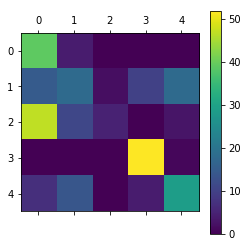

In [20]:
# Look at the final testing confusion matrix
pred = np.argmax(y.eval(feed_dict={x: test.reshape([-1,1296]), y_: onehot_test}), axis = 1)
conf = np.zeros([5,5])
for p,t in zip(pred,np.argmax(onehot_test,axis=1)):
    conf[t,p] += 1

plt.matshow(conf)
plt.colorbar()

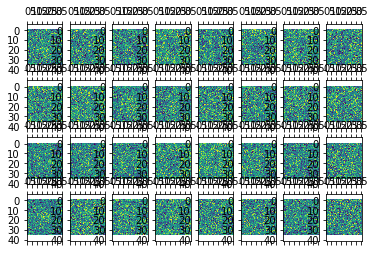

In [21]:
# Let's look at a subplot of some weights
f, plts = plt.subplots(4,8, sharex=True)
for i in range(32):
    plts[i//8, i%8].matshow(W1.eval()[:,i].reshape([36,36]))

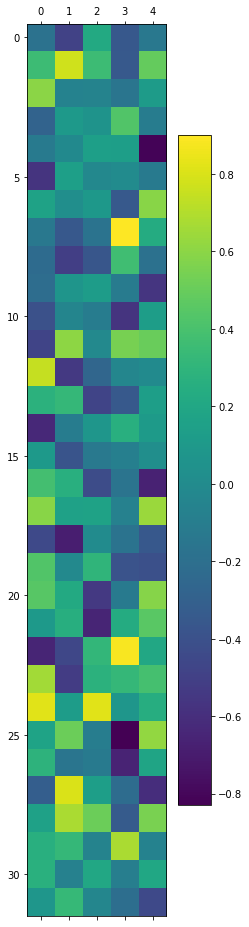

In [22]:
# Examine the output weights
plt.matshow(W3.eval())
plt.colorbar()

In [23]:
sess.close()

<h2>Confusion Matrix</h2>

In [24]:
#packages for confusion matrix
import itertools
import random
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.ticker as ticker
%matplotlib inline

ImportError: No module named sklearn.metrics

In [25]:
a=[]
b=[]

for i in dnn_test_pred:
    m=np.argmax(i)
    a.append(m)
    
for j in onehot_test:
    n=np.argmax(j)
    b.append(n)
    
    
prediction=np.asarray(a)
label=np.asarray(b)

In [26]:
class_names=['0' ,'1' ,'2' ,'3','4'] 


#Definition of our plotting
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    
    """
    This function prints and plots the confusion matrix (cm).
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation='horizontal')
    plt.yticks(tick_marks, classes)
    
    
#Set differences with and without normalization

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
  
 #some slight changes in order to plot % in the normalize confusion matrix
    if normalize:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, (("%.1f" % (cm[i,j]*100))),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        
    else:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(label, prediction)

#Setting print options. Float numbers precision of 2 for our output.
np.set_printoptions(precision=2)

NameError: name 'confusion_matrix' is not defined

In [28]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

NameError: name 'cnf_matrix' is not defined

In [29]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix %')

plt.show()

NameError: name 'cnf_matrix' is not defined